In [150]:
import numpy as np
import pandas as pd

In [151]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')  #Data Frame

In [152]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4945,ham,I'm already back home so no probably not,NaN,NaN,NaN
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
2816,spam,Gr8 Poly tones 4 ALL mobs direct 2u rply with ...,NaN,NaN,NaN
1633,ham,Yesterday its with me only . Now am going home.,NaN,NaN,NaN
664,ham,Yes baby! We can study all the positions of th...,NaN,NaN,NaN


In [153]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy



1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#Dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4728,ham,I've reached already.
4874,ham,I know dat feelin had it with Pete! Wuld get w...
4113,ham,Where are you ? What do you do ? How can you s...
5254,ham,I didnt get anything da
5563,ham,Ard 6 like dat lor.


In [9]:
#renaming the columns
df.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
2632,ham,I WILL CAL YOU SIR. In meeting
5490,ham,K. I will sent it again
3655,ham,Oh really?? Did you make it on air? What's you...
4541,spam,FreeMsg Hi baby wow just got a new cam moby. W...
1256,ham,"Not yet chikku..going to room nw, i'm in bus.."


In [10]:
#for assigning ham and spam 0 and 1 value
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target']) # assigning back the va;lue to the same column

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#Checking missing values

In [14]:
df.isnull().sum()

,0
target,0
text,0


In [15]:
#Checking for dublicate values
df.duplicated().sum()

np.int64(403)

In [16]:
# remove dublicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

2. Expollatory Data Analysis

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

,count
target,
0,4516
1,653


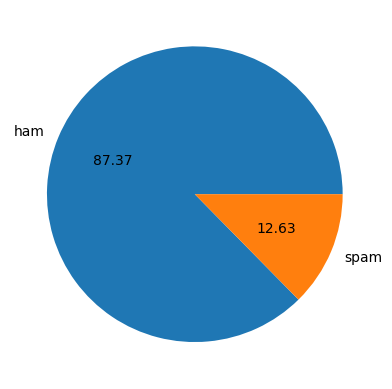

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [22]:
#Data is slightly imbalanced

In [23]:
!pip install nltk

In [24]:
import nltk #natural language tool kit

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
#Finding length in terms of no of characters used
df['num_characters']= df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [30]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len( nltk.word_tokenize(x)))


In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#analyzing ham and spam messages separately
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe() #This code is for ham messages

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#This code is for spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
#Plotting histogram to differentiate between ham and spam, usually the length of spam messages is longer
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

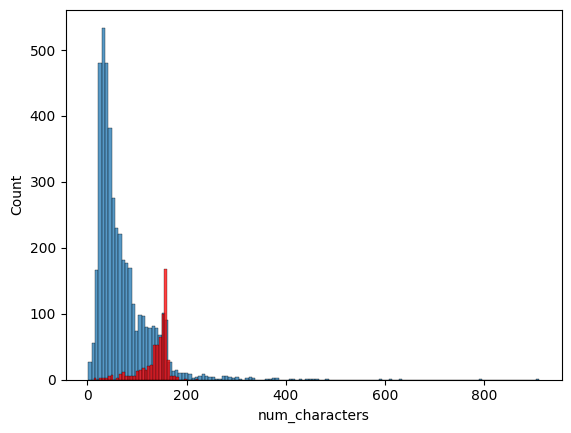

In [41]:
sns.histplot(df[df['target'] == 0]['num_characters']) #extracting number of charcaters in ham messages and then plotting histogram
sns.histplot(df[df['target'] == 1]['num_characters'], color='red') #extracting number of charcaters in spam messages(red colour) and then plotting histogram

<Axes: xlabel='num_words', ylabel='Count'>

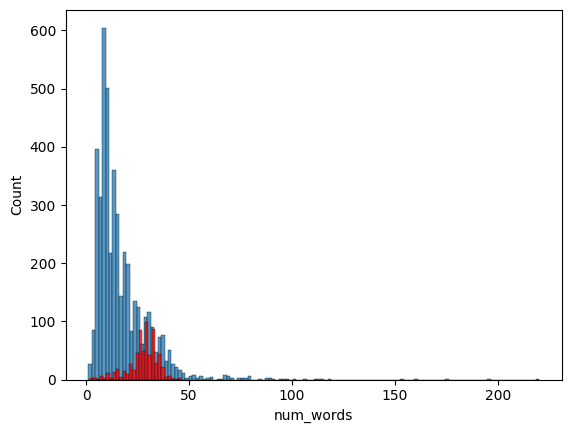

In [42]:
sns.histplot(df[df['target'] == 0]['num_words']) #extracting number of words in ham messages and then plotting histogram
sns.histplot(df[df['target'] == 1]['num_words'], color='red') #extracting number of words in spam messages(red colour) and then plotting histogram

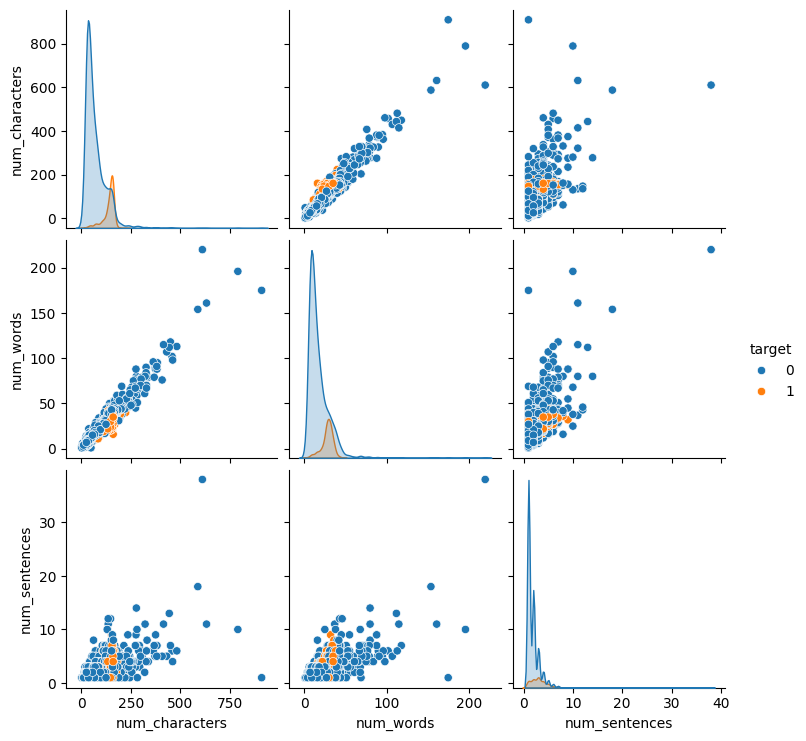

In [43]:
#Finding relation betweeen the columns, like relation between no-of-sentences and no-of-words
sns.pairplot(df, hue='target')

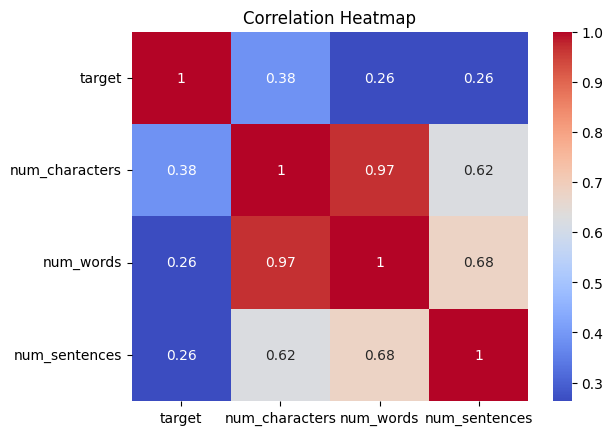

In [47]:
#Corelation coefficient
# Selecting only numeric columns
numeric_df = df.select_dtypes(include='number')

# Computing correlation and plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

3. **Data Prreprocessing**
*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming








In [71]:
#Creating a single function which will perform all the steps
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transfrom_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  #For removing special characters, we will only keep those characters that are alphabetic or alpha numeric
  # In the second loop we are roving stop words
  # In the third loop we are stemming
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)  #Returning a string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
transfrom_text("Hi, How are you 20 % swimming?")

'hi 20 swim'

In [75]:
df['transformed_text'] = df['text'].apply(transfrom_text)

In [76]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [77]:
#Creating word cloud to enlarge important words
#Creating word cloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [78]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

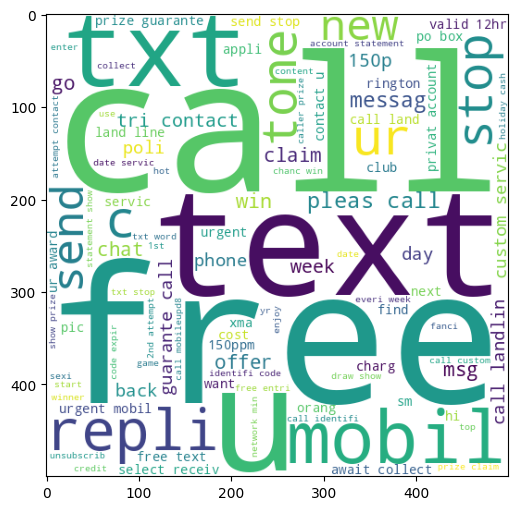

In [80]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [81]:
#Creating word cloud for ham messages
Ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

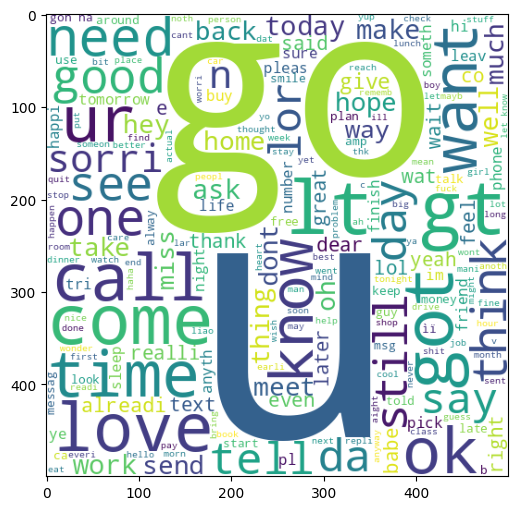

In [82]:
plt.figure(figsize=(15,6))
plt.imshow(Ham_wc)

In [87]:
#Finding where there is spam message what are the top 30 words being used there
spam_corpus =[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():#List of strings
  for word in msg.split():
    spam_corpus.append(word)



In [100]:
len(spam_corpus)

9939

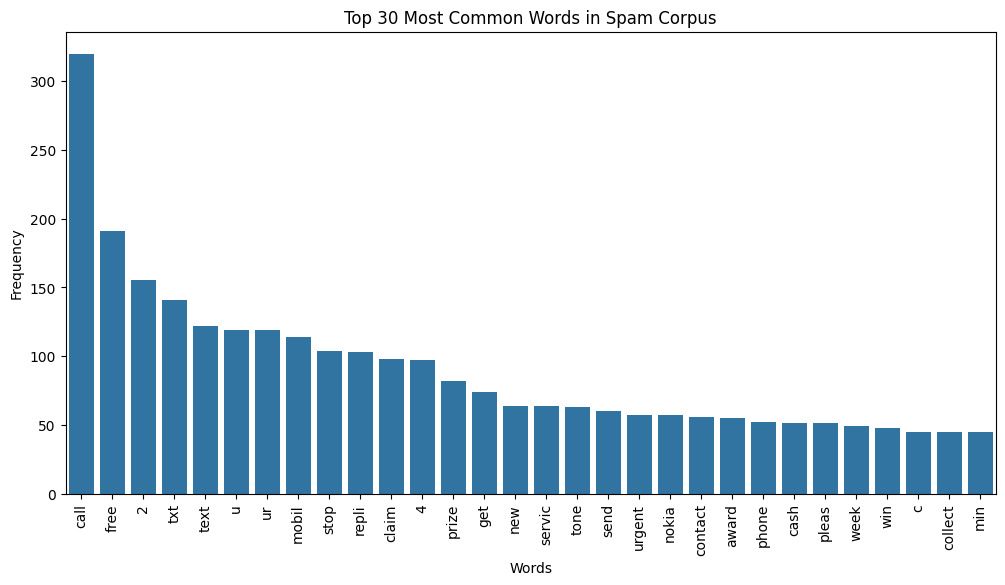

In [97]:
#Creating dictionary
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Counting the top 30 most common words in the spam corpus
common_words = Counter(spam_corpus).most_common(30)

# Creating a DataFrame
df_common = pd.DataFrame(common_words, columns=['word', 'frequency'])

# Ploting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='frequency', data=df_common)
plt.xticks(rotation=90)  # Rotate for better readability
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()



In [101]:
#Finding where there is spam message what are the top 30 words being used there
Ham_corpus =[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():#List of strings
  for word in msg.split():
    Ham_corpus.append(word)



In [102]:
len(Ham_corpus)

35404

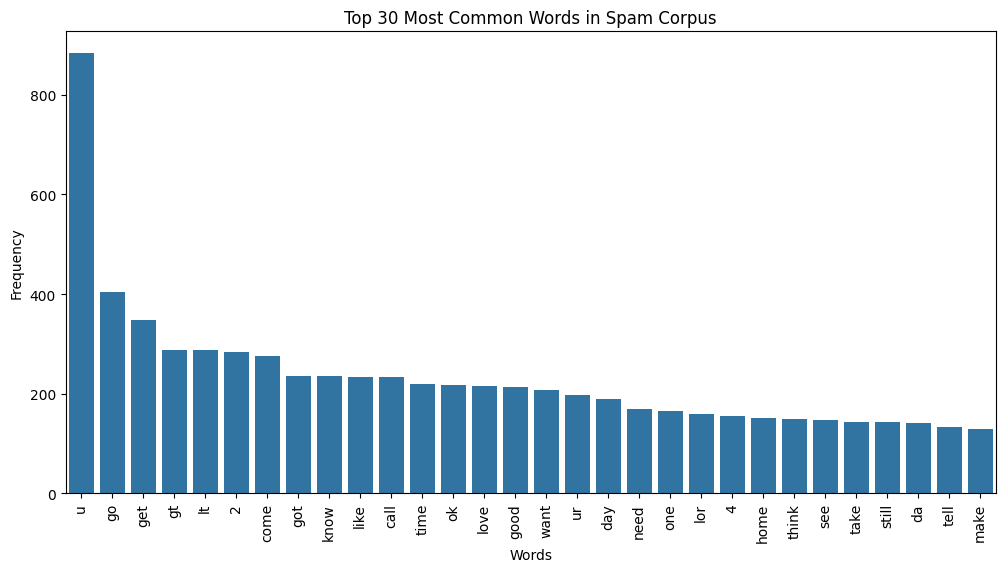

In [103]:
# Counting the top 30 most common words in the spam corpus
common_words = Counter(Ham_corpus).most_common(30)

# Creating a DataFrame
df_common = pd.DataFrame(common_words, columns=['word', 'frequency'])

# Ploting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='frequency', data=df_common)
plt.xticks(rotation=90)  # Rotate for better readability
plt.title('Top 30 Most Common Words in Ham Corpus')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

4. **Model Building**
    (Multinomial Naive Bayes Algorithm)

In [133]:
#This model takes numeric data but our transformed_Text is in text form, we will vectorize this data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [134]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [135]:
X.shape

(5169, 3000)

In [136]:
Y = df['target'].values

In [137]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [140]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [141]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [142]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [143]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [145]:
#Bernoulli
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# We have choosed tfidf and mnb

In [ ]:
#Model improve
#Only step 2 worked

In [148]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [149]:
from google.colab import files

files.download("vectorizer.pkl")
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>